# -1) imports de librairies

In [34]:
import pandas as pd
import os

# 0) imports de data

In [40]:
path = "/Users/romain/Downloads/formation_python-master/cyclistes.csv"

# 0.1) Vérifier que le chemin existe :

In [41]:
assert(os.path.isfile(path))

# 0.2) créer la dataframe

In [42]:
df = pd.DataFrame.from_csv(path)

# 1) compter adultes Vs les mineurs

In [13]:
df.head()

,sexe,sportivite,age,sur_velo
id,,,,
101,F,-0.285718,66,True
102,H,2.219441,37,True
103,F,2.637251,49,True
104,F,1.413551,33,True
105,H,-1.331255,36,True


In [14]:
adultes = df.age > 18

In [15]:
mineurs = df.age < 18

In [19]:
nb_mineurs = df[mineurs]["age"].count()
nb_adultes = df[adultes]["age"].count()

In [22]:
nb_mineurs, nb_adultes

(36, 949)

# 2) Ajouter une colonne dans la df en affectant un nom de colonne à une liste de valeur

In [27]:
cyclistes = df

In [28]:
cyclistes["est_adulte"] =  adultes

In [29]:
cyclistes.head()

,sexe,sportivite,age,sur_velo,est_adulte
id,,,,,
101,F,-0.285718,66,True,True
102,H,2.219441,37,True,True
103,F,2.637251,49,True,True
104,F,1.413551,33,True,True
105,H,-1.331255,36,True,True


# 3) compter la moyenne des sportivite par sexe

# 3.1) solution 1

In [52]:
cyclistes[mineurs]["age"].mean()

16.055555555555557

In [53]:
cyclistes[adultes]["age"].mean()

50.04531085353003

# 3.1.2) solution 1 bis

In [49]:
for majorite in [mineurs, adultes]:
    print("majorite: %s"%(cyclistes[majorite]["age"].mean()))

majorite: 16.055555555555557
majorite: 50.04531085353003


# 3.2) avec un group by

In [51]:
cyclistes.groupby(["est_adulte"])["age"].mean()

est_adulte
False    16.627451
True     50.045311
Name: age, dtype: float64

# 3.3) dessiner le résultat

# page de documentation sur les graphs en pandas : 
https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-on-a-secondary-y-axis

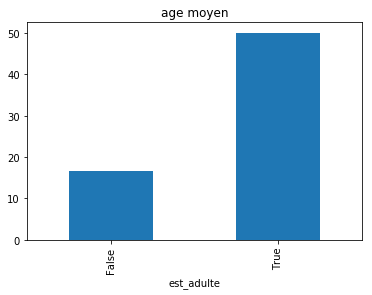

In [58]:
%matplotlib inline 
cyclistes.groupby(["est_adulte"])["age"].mean().plot.bar(title="age moyen")

# 4) Calculer et afficher, le min, max et mean par majorite

In [66]:
grouped  = cyclistes.groupby(["est_adulte"])["age"]

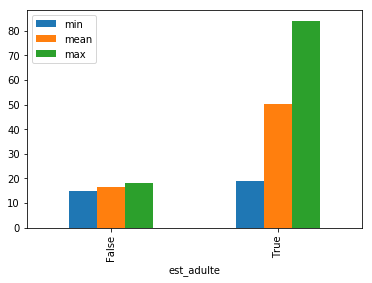

In [67]:
grouped.agg(["min", "mean",  "max"]).plot.bar()

# Pie Chart avec Pandas et value_counts

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1181b0b70>], dtype=object)

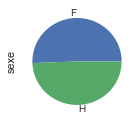

In [328]:
# Nouvelle figure
largeur_figure = 2
hauteur_figure = 2
plt.figure(figsize=(largeur_figure, hauteur_figure))
# calcul d
nb_personne_by_sexe = cyclistes["sexe"].value_counts()
nb_personne_by_sexe.plot.pie(subplots=True)

# 5) Scatter plot

In [75]:
age_sportivite = cyclistes[["age", "sportivite"]]

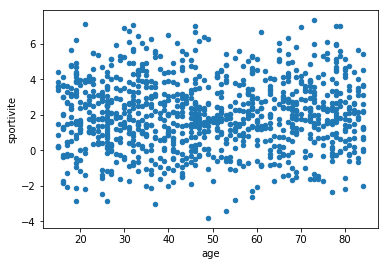

In [77]:
cyclistes.plot.scatter(x="age", y="sportivite")

# 5.1 Scatter plot avec moyenne

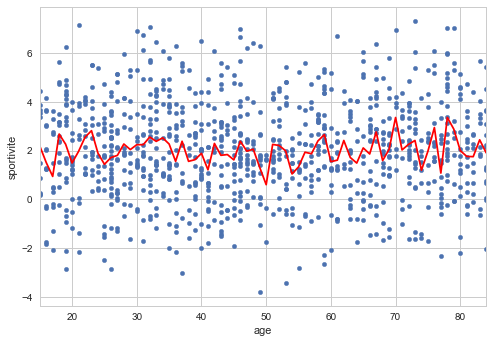

In [287]:
sportivite_moyenne_par_age = cyclistes.groupby("age")["sportivite"].mean()
cyclistes.plot.scatter(x="age", y="sportivite")
sportivite_moyenne_par_age.plot.line(c="red")


# 5.2) scatter plot avec deux écritures sur la même figure ( hommes / femmes) avec des couleurs différentes 

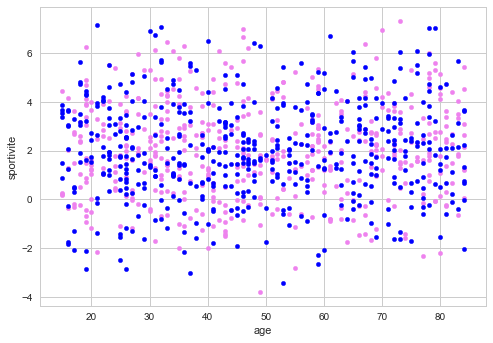

In [336]:
mask_femmes = cyclistes["sexe"]=="F"
mask_hommes = cyclistes["sexe"]=="H"
ax = cyclistes[mask_femmes].plot.scatter(x="age", y="sportivite", color="violet")
cyclistes[mask_hommes].plot.scatter(x="age", y="sportivite", color="blue", ax=ax)


# 5.2) scatter plot avec deux écritures sur la même figure ( hommes / femmes) avec des couleurs différentes , et des calculs de  moyenne

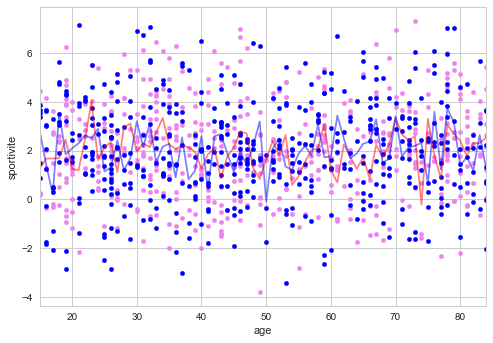

In [340]:
# Femmes
plt.figure()
mask_femmes            = cyclistes["sexe"]=="F"
femmes                 = cyclistes[mask_femmes]
sportivite_moyenne     = femmes.groupby("age")["sportivite"].mean()
ax                     = femmes.plot.scatter(x="age", y="sportivite", color="violet")
sportivite_moyenne.plot.line(c="red", alpha=0.5, ax=ax) 
#Hommes
mask_hommes            = cyclistes["sexe"]=="H"
hommes                 = cyclistes[mask_hommes]
sportivite_moyenne     = hommes.groupby("age")["sportivite"].mean()
hommes.plot.scatter(x="age", y="sportivite", color="blue", ax=ax)
sportivite_moyenne.plot.line(c="blue", alpha=0.5, ax=ax)



# 5.3) scatter plot avec 'fill between' sur l'écart type

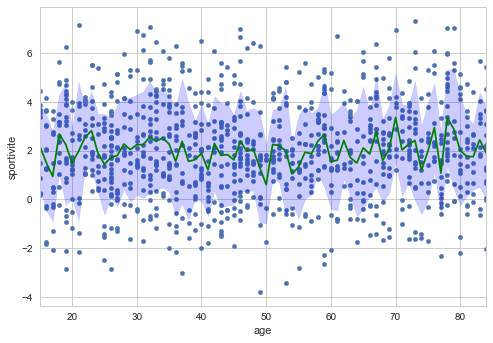

In [347]:
sportivite_moyenne_par_age = cyclistes.groupby("age")["sportivite"].mean()
ecart_type_sportivite      = cyclistes.groupby("age")["sportivite"].std()
borne_inferieure           = sportivite_moyenne_par_age - ecart_type_sportivite
borne_superieure           = sportivite_moyenne_par_age + ecart_type_sportivite
plt.figure()
ax = cyclistes.plot.scatter(x="age", y="sportivite")
sportivite_moyenne_par_age.plot.line(c="green")
plt.fill_between(std_sportivite_par_age.index, borne_inferieure, borne_superieure,color='b', alpha=0.2 )

# 5.3.1) Deux Scatter plots : un par sexe avec plt.subplots

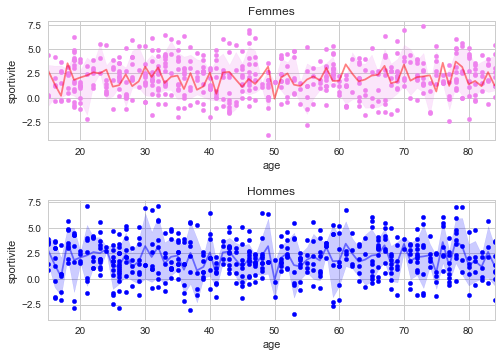

In [389]:


fig, axes = plt.subplots(2,1)
# Rajouter de l'espace entre les deux dessins
fig.subplots_adjust(hspace=0.5)

mask_femmes            = cyclistes["sexe"]=="F"
femmes                 = cyclistes[mask_femmes]
sportivite_moyenne_f   = femmes.groupby("age")["sportivite"].mean()
std_sportivite_f       = femmes.groupby("age")["sportivite"].std()
borne_inferieure       = sportivite_moyenne_f - std_sportivite_f
borne_superieure       = sportivite_moyenne_f + std_sportivite_f
femmes.plot.scatter(x="age", y="sportivite", color="violet", ax=axes[0])
sportivite_moyenne.plot.line(c="red", alpha=0.5, ax=axes[0])
ax = axes[0]
ax.fill_between(sportivite_moyenne_f.index, borne_inferieure, borne_superieure,color='violet', alpha=0.2 )
ax.set_title("Femmes")


plt.figure()
mask_hommes            = cyclistes["sexe"]=="H"
hommes                 = cyclistes[mask_hommes]
sportivite_moyenne_h   = hommes.groupby("age")["sportivite"].mean()
std_sportivite_h       = hommes.groupby("age")["sportivite"].std()
borne_inferieure       = sportivite_moyenne_h - std_sportivite_h
borne_superieure       = sportivite_moyenne_h + std_sportivite_h
ax = hommes.plot.scatter(x="age", y="sportivite", color="blue", ax=axes[1])
sportivite_moyenne_h.plot.line(c="blue", alpha=0.5, ax=axes[1])
ax = axes[1]
ax.fill_between(sportivite_moyenne_h.index, borne_inferieure, borne_superieure,color='blue', alpha=0.2 )
ax.set_title("Hommes")
plt.show()

# 5.3.2) Rationnalisation du code 

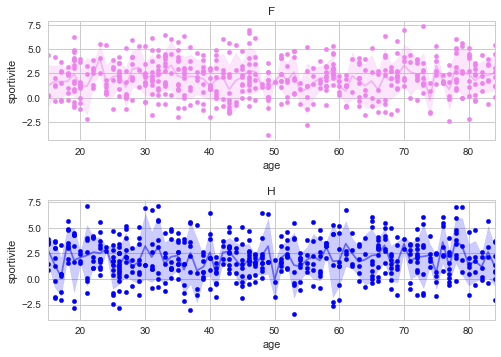

In [390]:
fig, axes = plt.subplots(2,1)
# Rajouter de l'espace entre les deux dessins
fig.subplots_adjust(hspace=0.5)

settings_femmes = ("F", "violet", axes[0])
settings_hommes = ("H", "blue"  , axes[1])

for sexe, color, ax in [settings_femmes, settings_hommes]:
    mask                 = cyclistes["sexe"]==sexe
    data                 = cyclistes[mask]
    sportivite_moyenne   = data.groupby("age")["sportivite"].mean()
    std_sportivite       = data.groupby("age")["sportivite"].std()
    borne_inferieure     = sportivite_moyenne - std_sportivite
    borne_superieure     = sportivite_moyenne + std_sportivite
    data.plot.scatter(x="age", y="sportivite", color=color, ax=ax)
    sportivite_moyenne.plot.line(c=color, alpha=0.5, ax=ax)
    ax.fill_between(sportivite_moyenne_f.index, borne_inferieure, borne_superieure,color=color, alpha=0.2 )
    ax.set_title(sexe)


# 5.3.3) rajouter des noms de variables pour remplacer les valeures "en dur"``


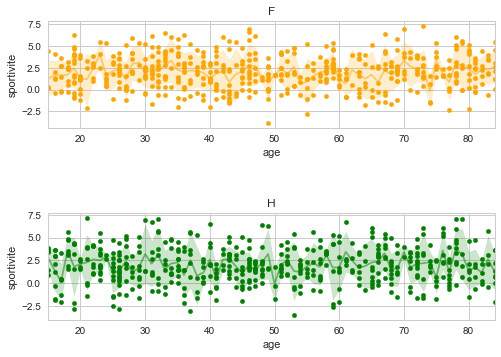

In [414]:

settings_femmes = (cyclistes, "sexe","F", "age", "sportivite", "orange")
settings_hommes = (cyclistes, "sexe","H", "age", "sportivite", "green"  )
settings        = [settings_femmes, settings_hommes]

fig, axes = plt.subplots(len(settings),1)
fig.subplots_adjust(hspace=0.8)

for i, (df, col_de_mask, valeur_voulue, abscisse, ordonnee, color) in enumerate(settings):
    mask                 = df[col_de_mask]==valeur_voulue
    data                 = df[mask].groupby(abscisse)[ordonnee]
    moyenne              = data.mean()
    std                  = data.std()
    borne_inferieure     = moyenne - std
    borne_superieure     = moyenne + std
    ax                   = axes[i]
    df[mask].plot.scatter(x=abscisse, y=ordonnee, color=color, ax=ax)
    moyenne.plot.line(c=color, alpha=0.5, ax=ax)
    ax.fill_between(moyenne.index, borne_inferieure, borne_superieure,color=color, alpha=0.2 )
    ax.set_title(valeur_voulue)


# 5.3.4) Replacing a scatter by an hexbin

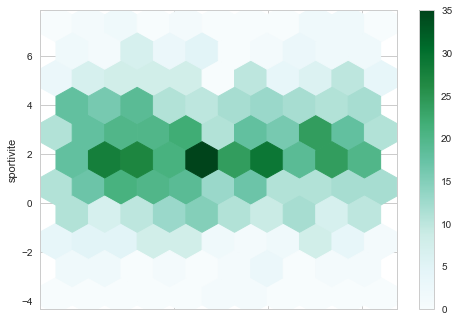

In [334]:
cyclistes.plot.hexbin(x="age", y="sportivite", gridsize=10)

# 5.3.5) Replacing a scatter by an hexbin

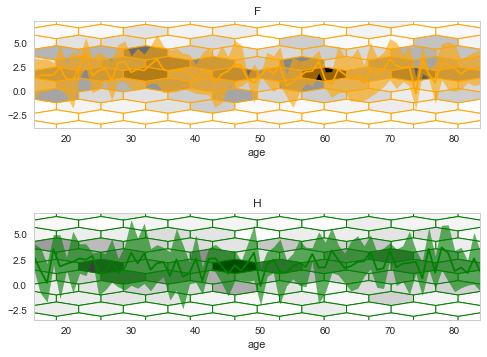

In [437]:
settings_femmes = (cyclistes, "sexe","F", "age", "sportivite", "orange")
settings_hommes = (cyclistes, "sexe","H", "age", "sportivite", "green"  )
settings        = [settings_femmes, settings_hommes]

fig, axes = plt.subplots(len(settings),1)
fig.subplots_adjust(hspace=0.8)

for i, (df, col_de_mask, valeur_voulue, abscisse, ordonnee, color) in enumerate(settings):
    mask                 = df[col_de_mask]==valeur_voulue
    data                 = df[mask].groupby(abscisse)[ordonnee]
    moyenne              = data.mean()
    std                  = data.std()
    borne_inferieure     = moyenne - std
    borne_superieure     = moyenne + std
    ax                   = axes[i]

    ax.hexbin(x=df[mask][abscisse], y=df[mask][ordonnee], gridsize=(10,5), color=color)
    #df[mask].plot.scatter(x=abscisse, y=ordonnee, color=color, ax=ax)
    moyenne.plot.line(c=color, alpha=1, ax=ax)
    ax.fill_between(moyenne.index, borne_inferieure, borne_superieure,color=color, alpha=0.6 )
    ax.set_title(valeur_voulue)


# 6) Violin plot avec Seaborn 

## 6.1) on prépare une dataframe avec la sportivité par sexe

In [438]:
result_df =pd.DataFrame()
for sexe in cyclistes.sexe.unique():
    data_serie = cyclistes[cyclistes.sexe == sexe]["sportivite"]
    data_df    = pd.DataFrame({"%s"%sexe : data_serie })
    result_df  = pd.concat([result_df, data_df],  axis=1)
result_df.head()

,F,H
id,,
101,-0.285718,NaN
102,NaN,2.219441
103,2.637251,NaN
104,1.413551,NaN
105,NaN,-1.331255


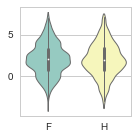

In [439]:
largeur_figure = 2
hauteur_figure = 2
plt.figure(figsize=(largeur_figure, hauteur_figure))
sns.violinplot(data=result_df, palette="Set3", bw=.2, cut=1, linewidth=1)


# Version vectoriséee

In [440]:
df         = cyclistes
col_mask   = df.sexe
sexes      = df.sexe.unique()
col_voulue = "sportivite"
data       = {sexe : df[col_mask == sexe][col_voulue] for sexe in sexes}
pd.DataFrame(data).head()

,F,H
id,,
101,-0.285718,NaN
102,NaN,2.219441
103,2.637251,NaN
104,1.413551,NaN
105,NaN,-1.331255


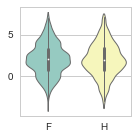

In [441]:
largeur_figure = 2
hauteur_figure = 2
plt.figure(figsize=(largeur_figure, hauteur_figure))
sns.violinplot(data=result_df, palette="Set3", bw=.2, cut=1, linewidth=1)


# 7) Kernel density estimation avec seaborn

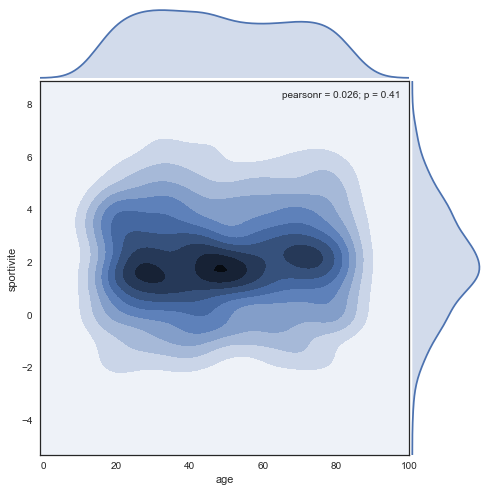

In [478]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.jointplot(cyclistes["age"], cyclistes["sportivite"], kind="kde", size=7, space=0)

# 7.1) KDE, Homme, femmes

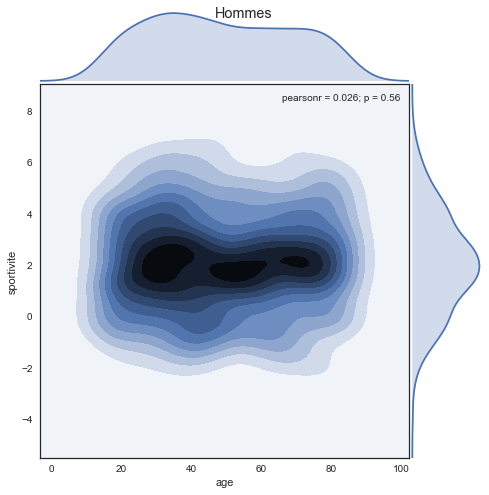

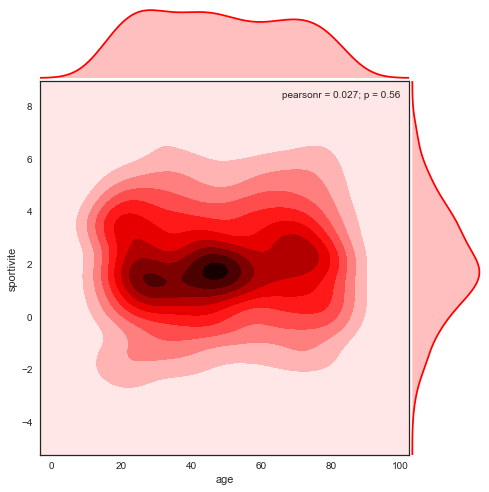

In [479]:
import numpy as np
import pandas as pd
import seaborn as sns
g = sns.jointplot(femmes["age"], femmes["sportivite"], kind="kde", size=7, space=0)
g.fig.suptitle('femmes')
sns.jointplot(hommes["age"], hommes["sportivite"], kind="kde", size=7, space=0, color="red")
g.fig.suptitle('Hommes')

# 7.2) KDE avec limites de niveaux

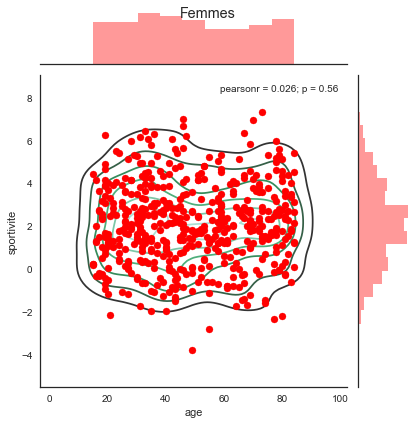

In [491]:
g = sns.jointplot("age", "sportivite",data=femmes, color="r")
g.plot_joint(sns.kdeplot, zorder=0, n_levels=6)
g.fig.suptitle('Femmes')

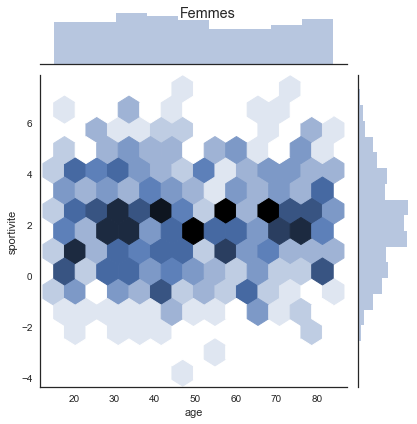

In [492]:
g = sns.jointplot(femmes["age"], femmes["sportivite"], kind="hex", stat_func=None)
g.set_axis_labels("age", "sportivite")
g.fig.suptitle('Femmes')

# 8) bokeh
https://bokeh.pydata.org/en/latest/

# 8.0) import bokeh

In [555]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

# 8.1) option d'affichage

In [556]:
opts = dict(plot_width=250, plot_height=250, min_border=0)

# 8.2) display

In [581]:
#créer une figure
p1 = figure(**opts)
#ajouter des points
r1 = p1.circle(x=femmes.age, y=femmes.sportivite, size=1)
#show
t  = show(p1, notebook_handle=True)

# 8.3) rajouter un 'tooltip' avec des informations contenues dans une colonne de la dataframe

In [583]:
#créer une figure
p1    = figure(**opts)
#créer un outil de "mouse over"
hover = HoverTool(tooltips=[("sportivite", "$y")])
#ajouter l'outil sur la figure 
p1.add_tools(hover)
#ajouter des points à dessiner
p1.circle(x="age", y="sportivite",size=1, source=femmes)
# show
t  = show(row(p1), notebook_handle=True)
# => passez la souris sur les points pour voir apparaître le tooltip

# 8.4) afficher deux figures sur une ligne de figure

In [580]:
# Première figure
fig_femmes      = figure(**opts, title="Femmes")
hover_femmes    = HoverTool(tooltips=[("sportivite", "$y")])
fig_femmes.circle(x=femmes.age, y=femmes.sportivite, size=1)
fig_femmes.add_tools(hover_femmes)
# Seconde figure
fig_hommes      = figure(**opts, title="Hommes")
hover_hommes    = HoverTool(tooltips=[("sportivite", "$y")])
fig_hommes.circle(x=hommes.age, y=hommes.sportivite, size=1, color="red")
fig_hommes.add_tools(hover_hommes)
# show in a row 
t = show(row(fig_femmes, fig_hommes), notebook_handle=True)

# 8.5) ajouter une ligne signifiant la moyenne

In [578]:
# Première figure
fig_femmes      = figure(**opts, title="Femmes")
hover_femmes    = HoverTool(tooltips=[("sportivite", "$y")])
moyenne_par_age = femmes.groupby('age')['sportivite'].mean()
index_moyenne   = moyenne_par_age.index.values
valeurs_moyenne = moyenne_par_age.values
fig_femmes.circle(x=femmes.age, y=femmes.sportivite, size=1)
fig_femmes.add_tools(hover_femmes)
fig_femmes.line(index_moyenne,valeurs_moyenne,  color='navy', alpha=0.5)
# Seconde figure
fig_hommes      = figure(**opts, title="Hommes")
hover_hommes    = HoverTool(tooltips=[("sportivite", "$y")])
moyenne_par_age = hommes.groupby('age')['sportivite'].mean()
index_moyenne   = moyenne_par_age.index.values
valeurs_moyenne = moyenne_par_age.values
fig_hommes.circle(x=hommes.age, y=hommes.sportivite, size=1, color="red")
fig_hommes.add_tools(hover_hommes)
fig_hommes.line(index_moyenne,valeurs_moyenne,  color='red', alpha=0.5)




t  = show(row(fig_femmes, fig_hommes), notebook_handle=True)
